## Heart Disease Health Indicators Machine Learning Project

#### Author: Michael Breen-McKay
#### Date: 03/15/2023

In [25]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, f1_score, recall_score

### Data Review

In [2]:
#load the data
df = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
df.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [5]:
describe = df.describe()
describe

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [6]:
df.corr()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
HeartDiseaseorAttack,1.000000,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,0.180272,-0.087299,-0.019790,...,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.099600,-0.141011
HighBP,0.209361,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.271596,-0.125267,-0.040555,...,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235
HighChol,0.180765,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.209085,-0.078046,-0.040859,...,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459
CholCheck,0.044206,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.067546,0.004190,0.023849,...,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259
BMI,0.052904,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.224379,-0.147294,-0.087518,...,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069
Smoker,0.114441,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.062914,-0.087401,-0.077666,...,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937
Stroke,0.203002,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.107179,-0.069151,-0.013389,...,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599
Diabetes,0.180272,0.271596,0.209085,0.067546,0.224379,0.062914,0.107179,1.000000,-0.121947,-0.042192,...,0.015410,0.035436,0.302587,0.073507,0.176287,0.224239,0.031040,0.185026,-0.130517,-0.171483
PhysActivity,-0.087299,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.121947,1.000000,0.142756,...,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539
Fruits,-0.019790,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.042192,0.142756,1.000000,...,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929


We will visualize this with a heat map

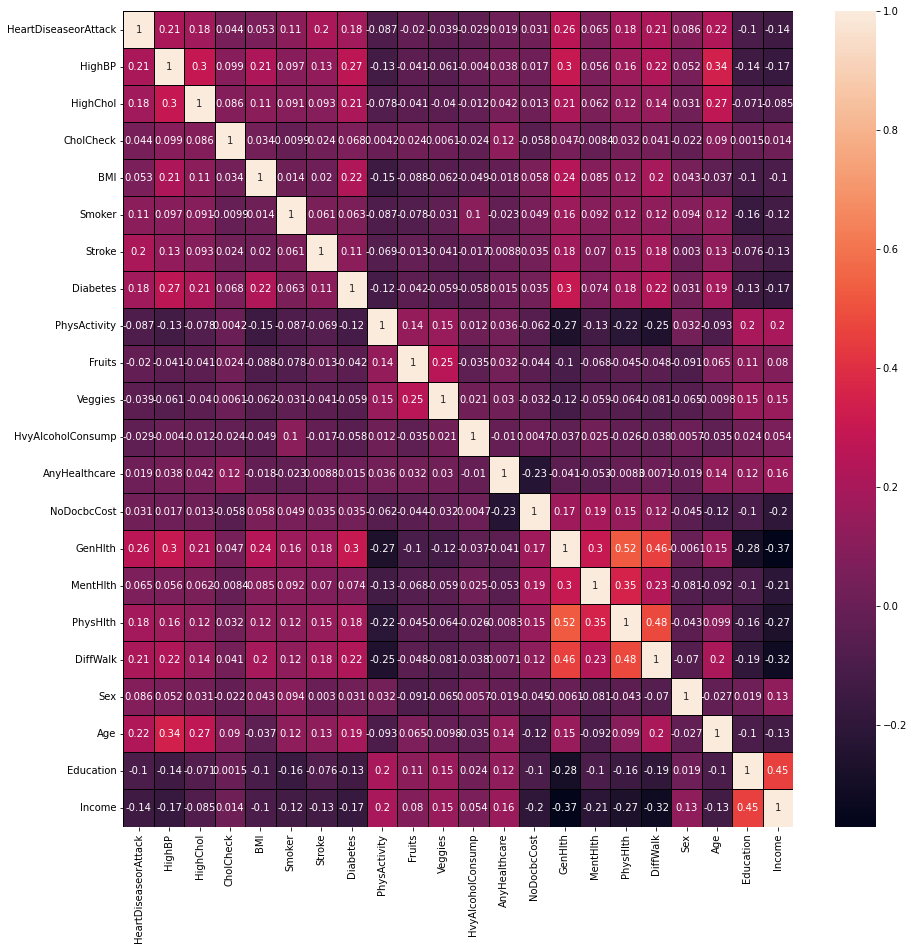

In [7]:
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, linecolor='black', ax=ax)
plt.show()

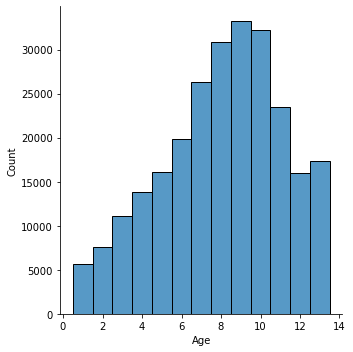

In [8]:
sns.displot(df, x="Age", discrete=True)

I'm interested in checking the correlation between features that have fairly strong correlation.  From above we see that HighBP, HighChol, Smoker, Stroke, Diabetes, GenHlth, PhysHlth, DiffWalk, Age, Education, and Income all have |corr|>.1. Going forward we will only consider these features. 

In [9]:
strong_corr = ['HeartDiseaseorAttack','HighBP', 'HighChol', 'Smoker',
               'Stroke', 'Diabetes', 'GenHlth', 'PhysHlth','MentHlth',
               'DiffWalk', 'Age', 'Education', 'Income']
df = df[strong_corr]

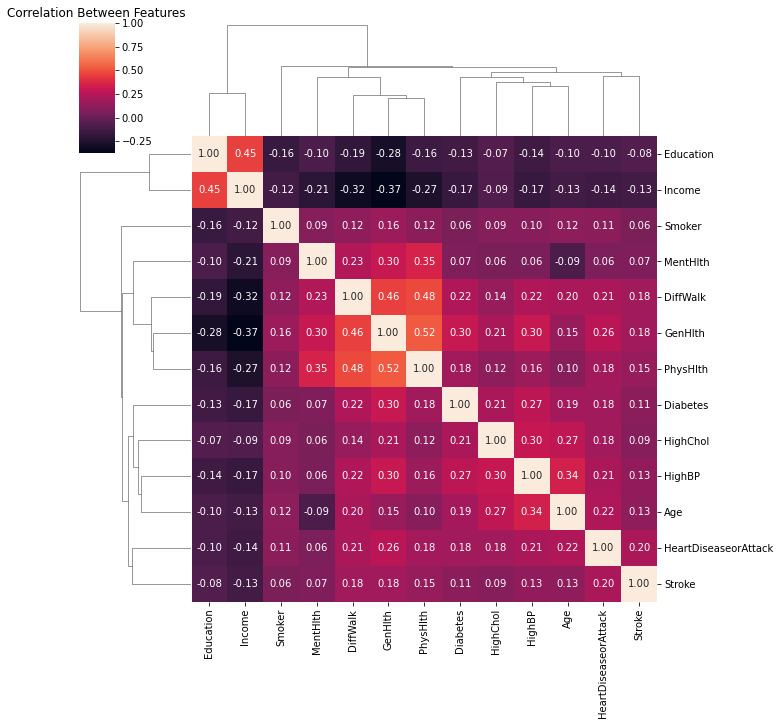

In [10]:
# Visualizing the correlation of the dataset with the seaborn library.
corr_matrix = df.corr()
sns.clustermap(corr_matrix, annot = True, fmt = ".2f")
plt.title("Correlation Between Features")
plt.show()

0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64


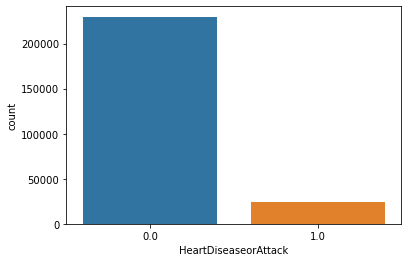

In [11]:
plt.figure()
sns.countplot(x=df.HeartDiseaseorAttack)
print(df.HeartDiseaseorAttack.value_counts())

We have a very low positive rate in our data.

6.0    107325
5.0     69910
4.0     62750
3.0      9478
2.0      4043
1.0       174
Name: Education, dtype: int64


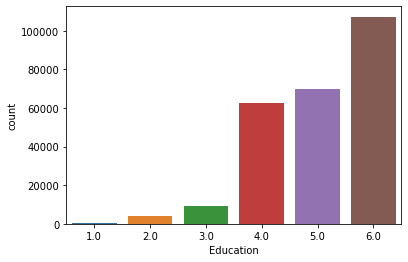

In [13]:
plt.figure()
sns.countplot(x=df["Education"])
print(df["Education"].value_counts())

In the scale used by the study, 1 is never attended school and 6 is 4 years of college and up.  We see that 6 is the largest bucket.  Also in the data provided, responses of 9 where the respondent refused to answer were removed. 

8.0    90385
7.0    43219
6.0    36470
5.0    25883
4.0    20135
3.0    15994
2.0    11783
1.0     9811
Name: Income, dtype: int64


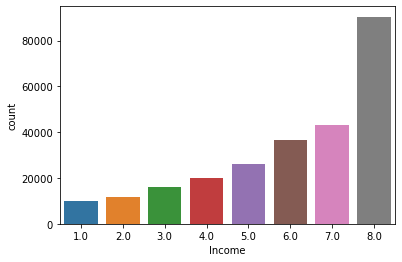

In [14]:
plt.figure()
sns.countplot(x=df["Income"])
print(df["Income"].value_counts())

In this question, 1 is for < 10,000 dollars per year and 6 is for > 75,000 dollars per year. Again the 'don't know' and 'refused to answer' responses were removed from the data, which leaves us with the largest bucket being those making more than $75,000. The results of this survey could be skewed towards college educated/middle class respondents.  

#### Setting up Machine Learning Models

In [15]:
x = df.drop(['HeartDiseaseorAttack'], axis=1)
y = df['HeartDiseaseorAttack']

Our dataset is fairly large and I would like to check a variety of models, which means processing time is a factor.  While I would like to use GridSearchCV to test a variety of parameters in each type of model, this might not be feasible for local processing.

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state=12)

In [17]:
print("x_train_shape: ", x_train.shape)
print("x_test_shape: ", x_test.shape)
print("y_train_shape: ", y_train.shape)
print("y_test_shape: ", y_test.shape)

x_train_shape:  (177576, 12)
x_test_shape:  (76104, 12)
y_train_shape:  (177576,)
y_test_shape:  (76104,)


Here we will scale the data. Although most features are already binary and the rest are fairly small numbers I still want to minimize any additional weight from the larger values. 

In [18]:
# Here we apply the StandardScaler to the data

SS = StandardScaler()
SSx_train = SS.fit_transform(x_train)
SSx_test = SS.fit_transform(x_test)

In [19]:
# Import Naive Bayes classification models
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

# Import Support Vector Machine classification models
from sklearn.svm import LinearSVC

# Import Logistic Regression model
from sklearn.linear_model import LogisticRegression

# Import K-Nearest Neighbors (KNN) model
from sklearn.neighbors import KNeighborsClassifier

# Import Decision Tree classification Models
from sklearn.tree import DecisionTreeClassifier

# Import Random Forest classification Models
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix

In [66]:
### We build a function to show a standardized confusion matrix
def make_conf_mat(y_pred,y_test,title):
    cf_matrix = confusion_matrix(y_test,y_pred)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
                    cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                         cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
    plt.title(title, fontsize = 20) # title with fontsize 20
    plt.show()

In [30]:
# The following dataframe will be used to store the results of each model
MLResults = pd.DataFrame(columns = ['Model_Name', 'Accuracy', 'Recall', 'F1_Score'])
Model_Name = ['GNB','BNB','SVC','LR','KNN','DTC','RFC']
Model_Dict = {}
for i in range(len(Model_Name)):
    Model_Dict[Model_Name[i]] = i
MLResults['Model_Name']=Model_Name

#### Gaussian Naive Bayes model (GNB)

In [75]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred_gnb = gnb.predict(x_test)

gnb_csv = cross_val_score(estimator = gnb, X=x_train, y=y_train, cv=5)

print('GaussianNB Accuracy:', accuracy_score(y_test, y_pred_gnb))
print('GaussianNB Recall Score:', recall_score(y_test, y_pred_gnb))
print('GaussianNB F1 Score:', f1_score(y_test, y_pred_gnb))

print("GaussianNB Cross Validation Mean: ", gnb_csv.mean())
print("GaussianNB Cross Validation Std: ", gnb_csv.std())
print("*********************************************")

MLResults['Accuracy'][Model_Dict['GNB']] = accuracy_score(y_test, y_pred_gnb)
MLResults['Recall'][Model_Dict['GNB']] = recall_score(y_test, y_pred_gnb)
MLResults['F1_Score'][Model_Dict['GNB']] = f1_score(y_test, y_pred_gnb)

GaussianNB Accuracy: 0.8341085882476611
GaussianNB Recall Score: 0.48498971898560655
GaussianNB F1 Score: 0.35916958530023857
GaussianNB Cross Validation Mean:  0.8365488612628077
GaussianNB Cross Validation Std:  0.0006277372505428085
*********************************************


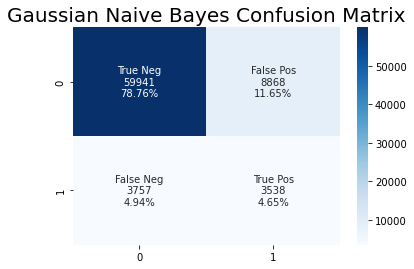

In [76]:
make_conf_mat(y_pred_gnb, y_test, 'Gaussian Naive Bayes Confusion Matrix')

#### Bernoulli Naive Bayes

In [77]:
bnb = BernoulliNB()
bnb.fit(x_train, y_train)
y_pred_bnb = bnb.predict(x_test)

bnb_csv = cross_val_score(estimator = bnb, X=x_train, y=y_train, cv=5)

print('BernoulliNB Accuracy:', accuracy_score(y_test,y_pred_bnb))
print('BernoulliNB Recall Score:', recall_score(y_test,y_pred_bnb))
print('BernoulliNB F1 Score:', f1_score(y_test,y_pred_bnb))

print("BernoulliNB Cross Validation Mean: ", bnb_csv.mean())
print("BernoulliNB Cross Validation Std: ", bnb_csv.std())
print("*********************************************")

MLResults['Accuracy'][Model_Dict['BNB']] = accuracy_score(y_test,y_pred_bnb)
MLResults['Recall'][Model_Dict['BNB']] = recall_score(y_test,y_pred_bnb)
MLResults['F1_Score'][Model_Dict['BNB']] = f1_score(y_test,y_pred_bnb)

BernoulliNB Accuracy: 0.8785477767265847
BernoulliNB Recall Score: 0.2937628512679918
BernoulliNB F1 Score: 0.3168009461157513
BernoulliNB Cross Validation Mean:  0.8822194443711984
BernoulliNB Cross Validation Std:  0.0010375841935700413
*********************************************


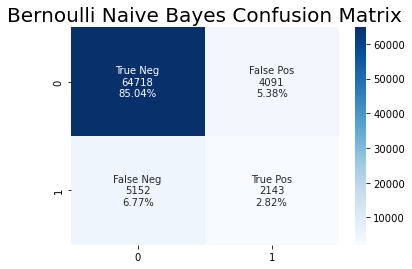

In [78]:
make_conf_mat(y_pred_bnb,y_test,'Bernoulli Naive Bayes Confusion Matrix')

### SVC model

In [79]:
#Not getting conversion yet... increase the iterations 
svc = LinearSVC(max_iter=10000)

svc.fit(x_train, y_train)
y_pred_svc = svc.predict(x_test)

print('LinearSVC accuracy: ', accuracy_score(y_test,y_pred_svc))
print('LinearSVC recall score: ', recall_score(y_test,y_pred_svc))
print('LinearSVC f1 score: ', f1_score(y_test,y_pred_svc))

print("*********************************************")

MLResults['Accuracy'][Model_Dict['SVC']] = accuracy_score(y_test,y_pred_svc)
MLResults['Recall'][Model_Dict['SVC']] = recall_score(y_test,y_pred_svc)
MLResults['F1_Score'][Model_Dict['SVC']] = f1_score(y_test,y_pred_svc)

LinearSVC accuracy:  0.9057605382108693
LinearSVC recall score:  0.03838245373543523
LinearSVC f1 score:  0.07242628039317123
*********************************************


C:\Users\mikeb\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


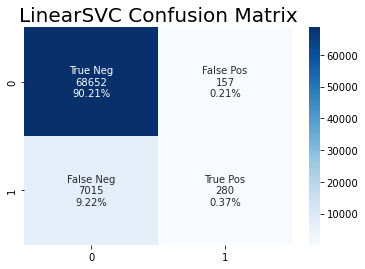

In [80]:
make_conf_mat(y_pred_svc, y_test, 'LinearSVC Confusion Matrix')

#### Logistic Regression Model

In [81]:
logr = LogisticRegression(random_state=1, max_iter=10000)

# p_lr = [{"penalty" : ["l1","l2"], "solver" : ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
#              "multi_class" : ["auto","ovr","multinomial"]}]

# grid_lr_acc = GridSearchCV(estimator=logr, param_grid=p_lr, scoring='accuracy', cv=4)
# grid_lr_f1 = GridSearchCV(estimator=logr, param_grid=p_lr, scoring='f1', cv=4)
logr.fit(x_train, y_train)
y_pred_logr = logr.predict(x_test)

# grid_search_lr_acc = grid_lr_acc.fit(x_train, y_train)
# y_pred_lr_acc = grid_search_lr_acc.predict(x_test)

# grid_search_lr_f1 = grid_lr_f1.fit(x_train, y_train)
# y_pred_lr_f1 = grid_search_lr_f1.predict(x_test)

# best_params_grid_lr_acc = grid_search_lr_acc.best_params_
# best_params_grid_lr_f1 = grid_search_lr_f1.best_params_

# best_score_grid_lr_acc = grid_search_lr_acc.best_score_
# best_score_grid_lr_f1 = grid_search_lr_f1.best_score_


print('Accuracy: ', accuracy_score(y_test,y_pred_logr))
print('Recall: ', recall_score(y_test,y_pred_logr))
print('F1 Score: ', f1_score(y_test,y_pred_logr))

print("*********************************************")

MLResults['Accuracy'][Model_Dict['LR']] = accuracy_score(y_test,y_pred_logr)
MLResults['Recall'][Model_Dict['LR']] = recall_score(y_test,y_pred_logr)
MLResults['F1_Score'][Model_Dict['LR']] = f1_score(y_test,y_pred_logr)

Accuracy:  0.905891937348891
Recall:  0.10760795065113091
F1 Score:  0.17979844251030688
*********************************************


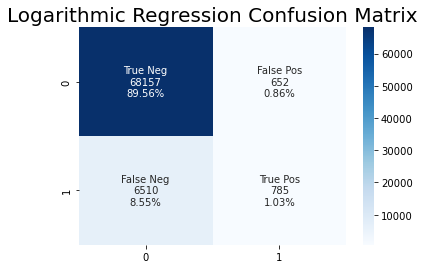

In [82]:
make_conf_mat(y_pred_logr,y_test,'Logarithmic Regression Confusion Matrix')

#### KNN Model

In [83]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

knn_acc = accuracy_score(y_test,y_pred_knn)
knn_recall = recall_score(y_test,y_pred_knn)
knn_f1 = f1_score(y_test,y_pred_knn)

print('KNN accuracy: ', knn_acc)
print('KNN recall: ', knn_recall)
print('KNN F1 score: ', knn_f1)

print("*********************************************")

MLResults['Accuracy'][Model_Dict['KNN']] = knn_acc
MLResults['Recall'][Model_Dict['KNN']] = knn_recall
MLResults['F1_Score'][Model_Dict['KNN']] = knn_f1


KNN accuracy:  0.9030274361400189
KNN recall:  0.05044551062371487
KNN F1 score:  0.09068506653523903
*********************************************


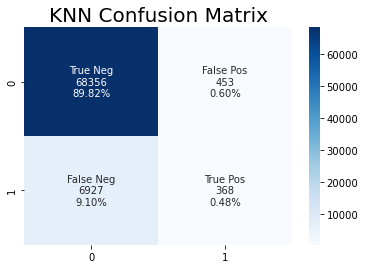

In [84]:
make_conf_mat(y_pred_knn,y_test,'KNN Confusion Matrix')

#### Decision Tree Model

In [85]:
tree = DecisionTreeClassifier(random_state=2)

tree.fit(x_train,y_train)
y_pred_tree = tree.predict(x_test)

tree_acc = accuracy_score(y_test,y_pred_tree)
tree_recall = recall_score(y_test,y_pred_tree)
tree_f1 = f1_score(y_test,y_pred_tree)

print('Accuracy: ', tree_acc)
print('Recall: ', tree_recall)
print('F1 Score: ', tree_f1)

print("*********************************************")

MLResults['Accuracy'][Model_Dict['DTC']] = tree_acc
MLResults['Recall'][Model_Dict['DTC']] = tree_recall                      
MLResults['F1_Score'][Model_Dict['DTC']] = tree_f1

Accuracy:  0.8704535898244508
Recall:  0.21795750514050719
F1 Score:  0.24388373341513916
*********************************************


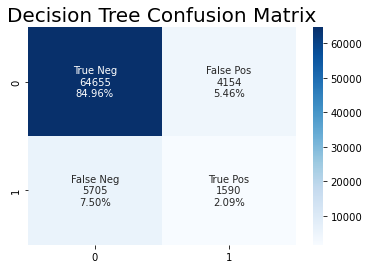

In [86]:
make_conf_mat(y_pred_tree, y_test, 'Decision Tree Confusion Matrix')

#### Random Forest Model

In [87]:
forest = RandomForestClassifier()
forest.fit(x_train,y_train)
y_pred_forest = forest.predict(x_test)

forest_acc = accuracy_score(y_test,y_pred_forest)
forest_recall = recall_score(y_test,y_pred_forest)
forest_f1 = f1_score(y_test,y_pred_forest)

print('Accuracy score: ', forest_acc)
print('Recall score: ', forest_recall)
print('F1 score: ', forest_f1)

print("*********************************************")

MLResults['Accuracy'][Model_Dict['RFC']] = forest_acc
MLResults['Recall'][Model_Dict['RFC']] = forest_recall
MLResults['F1_Score'][Model_Dict['RFC']] = forest_f1


Accuracy score:  0.8948149900136655
Recall score:  0.1421521590130226
F1 score:  0.2057743823792043
*********************************************


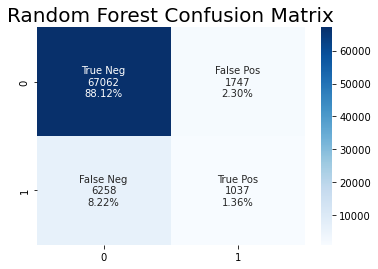

In [88]:
#Confusion matrix for Random Forest
make_conf_mat(y_pred_forest, y_test, 'Random Forest Confusion Matrix')

#### Model Results

In [89]:
MLResults

,Model_Name,Accuracy,Recall,F1_Score
0,GNB,0.834109,0.48499,0.35917
1,BNB,0.878548,0.293763,0.316801
2,SVC,0.905761,0.038382,0.072426
3,LR,0.905892,0.107608,0.179798
4,KNN,0.903027,0.050446,0.090685
5,DTC,0.870454,0.217958,0.243884
6,RFC,0.894815,0.142152,0.205774


We see that for these simple models our recall and F1_Scores are not great but GNB and BNB were the highest in these categories while SVC, LR, and KNN all had >90% accuracy. In the next notebook we will attempt to improve the accuracy and limit the false negatives. 